# Daten-Auslese

## Prep of data

### Paths

In [ ]:
# Kaja von Volkmann
ATAC_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

In [ ]:
# Pia Kentschke
ATAC_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

In [ ]:
# Helen Mennenoeh
ATAC_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

In [ ]:
# Laila Frisius
ATAC_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

### Packages and loading of dataset

In [1]:
# import of packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

# Load data sets
ATAC_seq = pd.read_csv(ATAC_seq_path)
RNA_seq = pd.read_csv(RNA_seq_path)
Cell_population_qc = pd.read_excel(Cell_population_qc_path)


# wie txt einlesen, sortierung iwi komisch
##Transcription_exons
##Voluntary

## Ideen/ Stuff

### first tries ATAC histograms

In [2]:
# peak ATAC histogram
#plt.hist(ATAC_seq["PeakScore"], bins=30, color="skyblue", edgecolor="black")
#plt.title("Histogram of Peak Scores ATAC-seq")
#plt.xlabel("Peak Score")
#plt.ylabel("Frequency")
#plt.show()

# ATAC_seq.info()

# Anzahl der Peaks pro Chromosom
# chrom_counts = ATAC_seq["chrom"].value_counts().sort_index()

#    plt.figure(figsize=(10,5))
#    chrom_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
#    plt.title("Peaks pro Chromosom")
#    plt.xlabel("Chromosom")
#    plt.ylabel("Anzahl der Peaks")
#    plt.xticks(rotation=45)
#    plt.tight_layout()
#    plt.show()


# log10 best p val
#?

# peak signal für Dendritische Zellen, CD4+, Milz (Spleen)

# X-Achse: Summit-Position (Peak-Zentrum)
# ATAC_seq["Summit"] = pd.to_numeric(ATAC_seq["Summit"], errors="coerce")
# x = ATAC_seq["Summit"]

# Y-Achse: Signalstärke für eine bestimmte Zelle
# y = ATAC_seq["LTHSC.34+.BM"]

# chr1 = ATAC_seq[ATAC_seq["chrom"] == "chr1"]

#   plt.figure(figsize=(10, 6))
#    plt.scatter(chr1["Summit"], chr1["LTHSC.34+.BM"], alpha=0.5, s=10, color='teal')
#    plt.title("Signalstärke in LTHSC.34+.BM auf chr1")
#    plt.xlabel("Summit Position auf chr1")
#    plt.ylabel("Signalstärke")
#    plt.grid(True)
#    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SampleName                                  181 non-null    object 
 1   CellType                                    181 non-null    object 
 2   ImmGenLab                                   181 non-null    object 
 3   Lineage                                     181 non-null    object 
 4   CellFamily                                  181 non-null    object 
 5   Organ                                       181 non-null    object 
 6   SortingMarkers                              181 non-null    object 
 7   InputCellNumber                             181 non-null    int64  
 8   PF.reads                                    181 non-null    int64  
 9   %chrM.mapped                                181 non-null    float64
 10  Paired.read.af

### exploring data, heads, NAs, ...

In [3]:
#ATAC_seq.duplicated('ImmGenATAC1219.peakID').sum()
ATAC_seq.head()
Cell_population_qc.head()
Cell_population_qc.info()

print(Cell_population_qc.columns)
print(Cell_population_qc.isnull().sum())
print(Cell_population_qc["%fragment.1Kb_TSS"])
print(Cell_population_qc.isna().sum())


Index(['SampleName', 'CellType', 'ImmGenLab', 'Lineage', 'CellFamily', 'Organ',
       'SortingMarkers', 'InputCellNumber', 'PF.reads', '%chrM.mapped',
       'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS',
       'Replicate.cor'],
      dtype='object')
SampleName                                    0
CellType                                      0
ImmGenLab                                     0
Lineage                                       0
CellFamily                                    0
Organ                                         0
SortingMarkers                                0
InputCellNumber                               0
PF.reads                                      0
%chrM.mapped                                  0
Paired.read.after.removing.PCR.duplication    0
%fragment.1Kb_TSS                             0
Replicate.cor                                 5
dtype: int64
0      10.60
1       7.70
2      11.13
3      18.96
4      13.21
       ...  
176     8.22

# Check for natural cutoff QC metrics -> Thresholds

## Overview

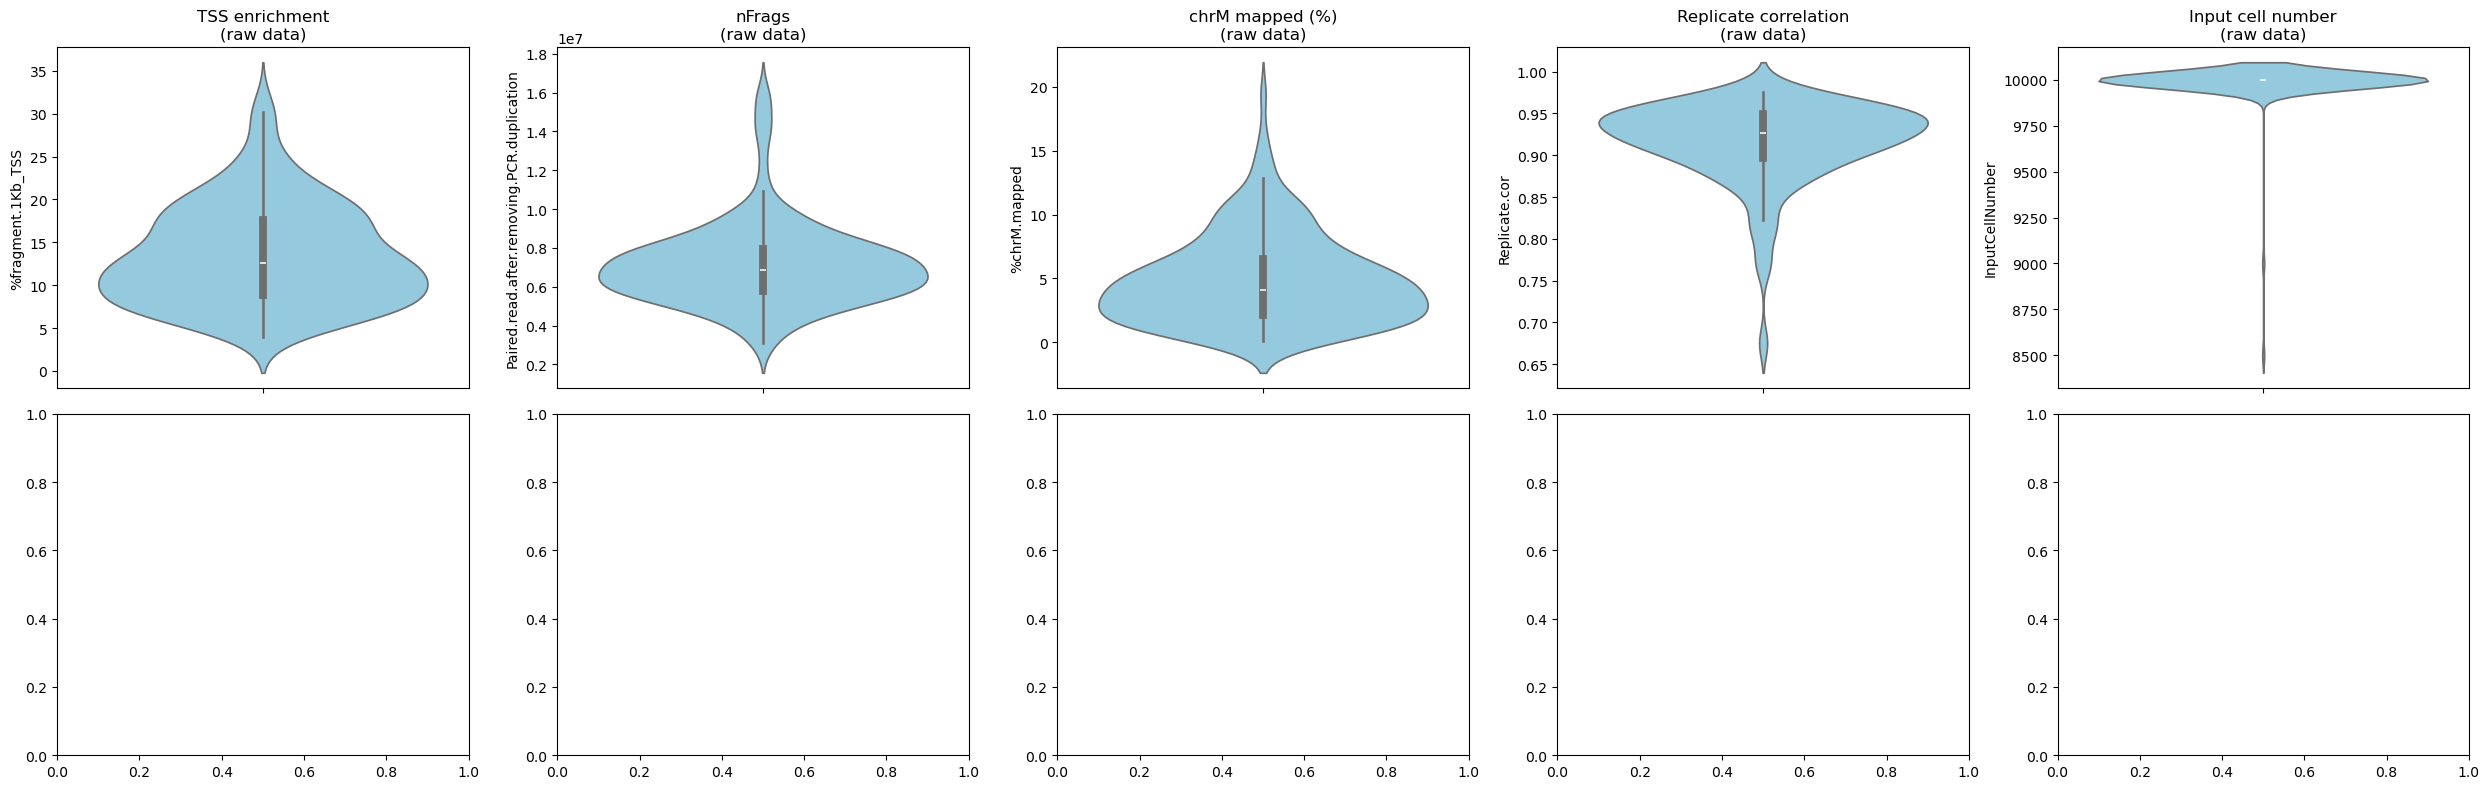

In [4]:
metrics = [
    ("%fragment.1Kb_TSS", "TSS enrichment"),
    ("Paired.read.after.removing.PCR.duplication", "nFrags"),
    ("%chrM.mapped", "chrM mapped (%)"),
    ("Replicate.cor", "Replicate correlation"),
    ("InputCellNumber", "Input cell number")
]
fig, axes = plt.subplots(2, len(metrics), figsize=(5*len(metrics), 8))

Cell_population_qc = Cell_population_qc.dropna(subset=[
    "%fragment.1Kb_TSS",
    "Paired.read.after.removing.PCR.duplication",
    "%chrM.mapped",
    "Replicate.cor",
    "InputCellNumber"
])



for i, (col, label) in enumerate(metrics):
    # Vor dem Filtern
    sns.violinplot(y=Cell_population_qc[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"{label}\n(raw data)")
    # axes[0, i].axhline(locals()[f"{label.split()[0]}_min"] if "min" in locals() else None,
                       # color="red", linestyle="--")
    
    # Nach dem Filtern
    # sns.violinplot(y=filtered[col], ax=axes[1, i], color='lightgreen')
    # axes[1, i].set_title(f"{label}\n(nach Filter)")
    # axes[1, i].axhline(locals()[f"{label.split()[0]}_min"] if "min" in locals() else None,
                       # color="red", linestyle="--")

plt.tight_layout()
plt.show()

## TSS Enrichment

Text(0.5, 1.0, 'TSS Enrichment Distribution')

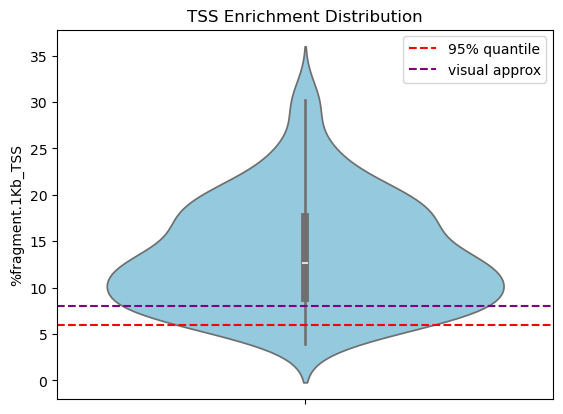

In [5]:
sns.violinplot(data=Cell_population_qc, y="%fragment.1Kb_TSS", color='skyblue')
plt.axhline(Cell_population_qc["%fragment.1Kb_TSS"].quantile(.05), color='red', linestyle='--', label="95% quantile")
plt.axhline(8, color='purple', linestyle='--', label="visual approx")
plt.legend()
plt.title("TSS Enrichment Distribution")

# gaussian KDE for more precise blue line

According to Buensrosto et al. (2013) is a TSS Enrichment score (peak?) >8 viewed as good, >10 as excellent.
The 95% quantile will exclude very little data. The cutoff at the visual approximation can be optimized via KDE we can investigate a more precise threshold later.

-> Decide for which?

## Post-filter peak signal
### good?